# Context

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [128]:
train_data = pd.read_csv('train.csv')

# Data quality assessment

In [129]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


Имеем 12 столбцов: PassengerId - Id пассажира, Survived - индикатор выживаемости, Pclass - класс, которым плыл пассажир, Name - имя, Sex - пол, Age - возраст, SibSp - количество братьев, сестер, супругов на борту, Parch - количество родителей, детей на борту, Ticket - билет, Fare - стоимость, Cabin - каюта, Embarked - порт.

In [130]:
train_data.shape

(100000, 12)

In [131]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Таким образом, пропусков нет в столбцах PassengerId, Survived, Pclass, Name, Sex, SibSp, Parch. В столбцах Age, Ticket, Fare, Embarked более 90% записей заполнено, а вот в столбце Cabin всего около 30%. Попробуем заполнить пропуски.

Начнем со столбца с портом.

In [132]:
embarked_data = train_data.groupby('Embarked')['PassengerId'].aggregate('count')
embarked_data

Embarked
C    22187
Q     5424
S    72139
Name: PassengerId, dtype: int64

Как видим, больше всего (значительно больше) людей село в порту Southampton, заполним пропуски в этом столбце буквой S.

In [133]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     100000 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Теперь посмотрим на возраст. Заменим пропуски на средний возраст по классу, так как с увеличением возраста увеличивается благосостояние.

In [134]:
age_data = train_data.groupby('Pclass')['Age'].aggregate('mean')
dict(age_data)

{1: 44.77446393895003, 2: 38.631237243518086, 3: 33.407362204724414}

In [135]:
dict_mean_age = dict(age_data)
train_data['mean_age'] = train_data['Pclass'].map(dict_mean_age)
train_data['Age'] = train_data['Age'].fillna(train_data['mean_age'])
train_data = train_data.drop('mean_age', axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          100000 non-null  float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     100000 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Аналогичным образом заменим пропущенные значения в столбце с оплатой (среднее по классу)

In [136]:
fare_data = train_data.groupby('Pclass')['Fare'].aggregate('mean')
dict(fare_data)

{1: 92.65311345995045, 2: 25.756003422146176, 3: 20.618226058504664}

In [137]:
dict_mean_fare = dict(fare_data)
train_data['mean_fare'] = train_data['Pclass'].map(dict_mean_fare)
train_data['Fare'] = train_data['Fare'].fillna(train_data['mean_fare'])
train_data = train_data.drop('mean_fare', axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          100000 non-null  float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         100000 non-null  float64
 10  Cabin        32134 non-null   object 
 11  Embarked     100000 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


# Data exploration

Посмотрим, сколько пассажиров выжило.

In [138]:
survived_data = pd.Series.to_frame(train_data.groupby('Survived')['PassengerId'] \
                                          .aggregate('count')).reset_index().rename(columns={'PassengerId': 'surv_amount'})
survived_data

,Survived,surv_amount
0,0,57226
1,1,42774


Пассажиров больше погибло, чем спаслось.

Посмотрим, кого больше - мужчин или женщин

In [139]:
sex_data = pd.Series.to_frame(train_data.groupby('Sex')['PassengerId'] \
                                          .aggregate('count')).reset_index().rename(columns={'PassengerId': 'surv_amount'})
sex_data

,Sex,surv_amount
0,female,43886
1,male,56114


Больше мужчин, чем женщин

Посмотрим, сколько пассажиров из каждого класса выжило.

In [140]:
survived_pclass_data = pd.Series.to_frame(train_data.groupby(['Pclass', 'Survived'])['PassengerId'] \
                                          .aggregate('count')).reset_index().rename(columns={'PassengerId': 'surv_amount'})
survived_pclass_data

,Pclass,Survived,surv_amount
0,1,0,12739
1,1,1,17576
2,2,0,13622
3,2,1,15057
4,3,0,30865
5,3,1,10141


Для сравнения процента выживаемости нам необходимо поделить количество выживших на общее количество людей в классе и умножить на 100. В столбце Survived индекс 0, если человек не выжил, и 1, если спасся.

In [141]:
dict_pclass_data = dict(train_data.groupby(['Pclass'])['PassengerId'].aggregate('count'))
dict_pclass_data

{1: 30315, 2: 28679, 3: 41006}

Оставим только выживших

In [142]:
survived_pclass_data['whole_amont'] = survived_pclass_data['Pclass'].map(dict_pclass_data)
survived_pclass_data['percent_of_survived'] = survived_pclass_data['surv_amount'] / survived_pclass_data['whole_amont'] * 100
survived_pclass_data = survived_pclass_data.drop_duplicates('Pclass', keep='last').reset_index(drop=True).set_index('Pclass')
survived_pclass_data

,Survived,surv_amount,whole_amont,percent_of_survived
Pclass,,,,
1,1,17576,30315,57.977899
2,1,15057,28679,52.501831
3,1,10141,41006,24.730527


Проиллюстрируем

<AxesSubplot:title={'center':'Статистика выживших'}, xlabel='Номер класса', ylabel='Процент выживших'>

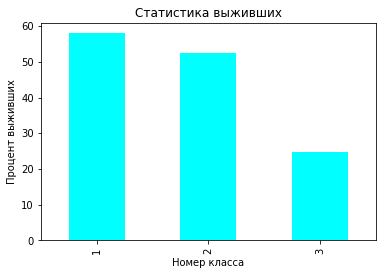

In [143]:
survived_pclass_data['percent_of_survived'].plot.bar(color=(0, 1, 1),
                                                     #figsize=(6, 15),
                                                     title='Статистика выживших',
                                                     xlabel='Номер класса',
                                                     ylabel='Процент выживших')

Гистограмма наглядно показывает, что больше всего спаслось людей, имевших места в 1 классе, меньше всего - в 3. Однако разница между 1 и 2 и между 2 и 3 довольно сильно отличается - в первом случае небольшая, во втором - очень большая.

Посмотрим теперь процент выживаемости в соответствии с полом.

<AxesSubplot:title={'center':'Статистика выживших'}, xlabel='Пол', ylabel='Процент выживших'>

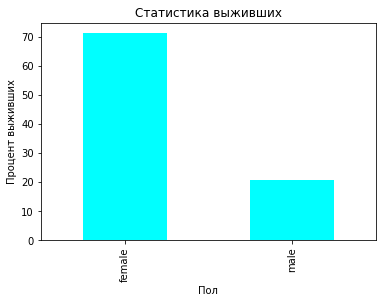

In [144]:
survived_sex_data = pd.Series.to_frame(train_data.groupby(['Sex', 'Survived'])['PassengerId'] \
                                          .aggregate('count')).reset_index().rename(columns={'PassengerId': 'surv_amount'})
dict_sex_data = dict(train_data.groupby(['Sex'])['PassengerId'].aggregate('count'))
survived_sex_data['whole_amont'] = survived_sex_data['Sex'].map(dict_sex_data)
survived_sex_data['percent_of_survived'] = survived_sex_data['surv_amount'] / survived_sex_data['whole_amont'] * 100
survived_sex_data = survived_sex_data.drop_duplicates('Sex', keep='last').reset_index(drop=True).set_index('Sex')
survived_sex_data['percent_of_survived'].plot.bar(color=(0, 1, 1),
                                                     #figsize=(6, 15),
                                                     title='Статистика выживших',
                                                     xlabel='Пол',
                                                     ylabel='Процент выживших')

Из пассажиров выжили около 70% женщин и около 20% мужчин. Возможно, женщинам отдавалось предпочтение при посадке в шлюпки, возможно, их было значительно меньше.

<BarContainer object of 2 artists>

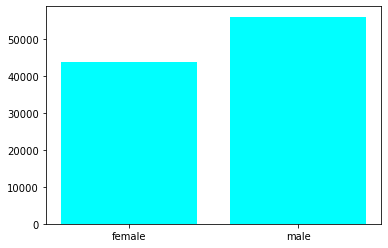

In [145]:
plt.bar(dict_sex_data.keys(), dict_sex_data.values(), label="Количество женщин и мужчин", color=(0, 1, 1))

Женщин было меньше, чем мужчин, но не слишком, то есть более вероятна первая гипотеза.

Выделим отдельные таблицы для мужчин и женщин и посмотрим связь выживаемости с возрастом.

<AxesSubplot:title={'center':'Статистика выживших'}, xlabel='Age'>

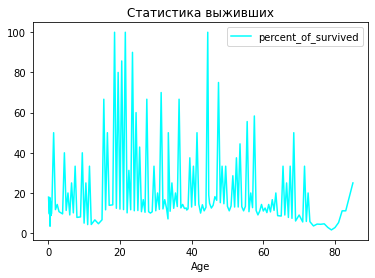

In [146]:
train_data_male = train_data[train_data['Sex'] == 'male']

survived_male_age_data = pd.Series.to_frame(train_data_male.groupby(['Age', 'Survived'])['PassengerId'] \
                                          .aggregate('count')).reset_index().rename(columns={'PassengerId': 'surv_amount'})
dict_male_age_data = dict(train_data.groupby(['Age'])['PassengerId'].aggregate('count'))
survived_male_age_data['whole_amount'] = survived_male_age_data['Age'].map(dict_male_age_data)
survived_male_age_data['percent_of_survived'] = survived_male_age_data['surv_amount'] / survived_male_age_data['whole_amount'] * 100
survived_male_age_data = survived_male_age_data.drop_duplicates('Age', keep='last').reset_index(drop=True).drop(['Survived', 'surv_amount', 'whole_amount'], axis=1).set_index('Age')
survived_male_age_data.plot(color=(0, 1, 1), title='Статистика выживших')

<AxesSubplot:title={'center':'Статистика выживших'}, xlabel='Age'>

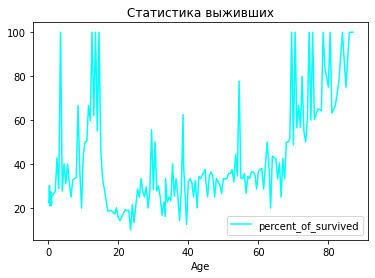

In [147]:
train_data_female = train_data[train_data['Sex'] == 'female']

survived_female_age_data = pd.Series.to_frame(train_data_female.groupby(['Age', 'Survived'])['PassengerId'] \
                                          .aggregate('count')).reset_index().rename(columns={'PassengerId': 'surv_amount'})
dict_female_age_data = dict(train_data.groupby(['Age'])['PassengerId'].aggregate('count'))
survived_female_age_data['whole_amount'] = survived_female_age_data['Age'].map(dict_female_age_data)
survived_female_age_data['percent_of_survived'] = survived_female_age_data['surv_amount'] / survived_female_age_data['whole_amount'] * 100
survived_female_age_data = survived_female_age_data.drop_duplicates('Age', keep='last').reset_index(drop=True).drop(['Survived', 'surv_amount', 'whole_amount'], axis=1).set_index('Age')
survived_female_age_data.plot(color=(0, 1, 1), title='Статистика выживших')

Таким образом, среди женщин в основном выжили люди до 20 лет и после 70, про мужчин же ничего сказать нельзя

Посмотрим процент выживаемости в соответствии с портом

<AxesSubplot:title={'center':'Статистика выживших'}, xlabel='Порт', ylabel='Процент выживших'>

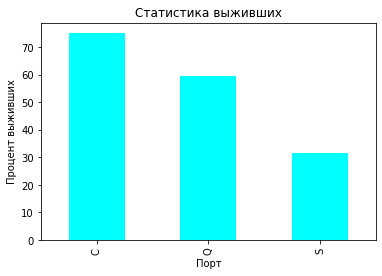

In [148]:
survived_embarked_data = pd.Series.to_frame(train_data.groupby(['Embarked', 'Survived'])['PassengerId'] \
                                          .aggregate('count')).reset_index().rename(columns={'PassengerId': 'surv_amount'})
dict_embarked_data = dict(train_data.groupby(['Embarked'])['PassengerId'].aggregate('count'))
survived_embarked_data['whole_amont'] = survived_embarked_data['Embarked'].map(dict_embarked_data)
survived_embarked_data['percent_of_survived'] = survived_embarked_data['surv_amount'] / survived_embarked_data['whole_amont'] * 100
survived_embarked_data = survived_embarked_data.drop_duplicates('Embarked', keep='last').reset_index(drop=True).set_index('Embarked')
survived_embarked_data['percent_of_survived'].plot.bar(color=(0, 1, 1),
                                                     #figsize=(6, 15),
                                                     title='Статистика выживших',
                                                     xlabel='Порт',
                                                     ylabel='Процент выживших')

In [149]:
train_data.groupby('Embarked')['PassengerId'].aggregate('count')

Embarked
C    22187
Q     5424
S    72389
Name: PassengerId, dtype: int64

Нельзя выдвинуть никакую гипотезу, потому что количество людей в портах сильно различается

# Summary

Предобработка:
1. Больше всего людей садилось в порте Southampton, заменили пропущенные значения на соответствующую аббревиатуру
2. Класс каюты - показатель благосостояния, заменили пропущенные значения в столбце с оплатой на среднее по классу
3. С возрастом благосостояние увеличивется, поэтому пропущенные значения в столбце с возрастом заменили на средний возраст по классу

Исследование:
1. Пассажиров больше погибло, чем спаслось.
2. Среди пассажиров было больше мужчин, чем женщин.
3. Зависимость количества выживших от класса - чем лучше класс, тем больше процент выживаемости.
4. Зависимость количества выживших от пола - женщины выживали с большей вероятностью, чем мужчины.
5. Зависимость выживаемости женщин и мужчин от возраста. Из женщин с большой вероятностью выжили старше 70 и моложе 20, про мужчин ничего сказать нельзя.
6. Зависимость от порта - непонятно, количество людей сильно разнится.